In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris.drop('Id',axis=1,inplace=True)

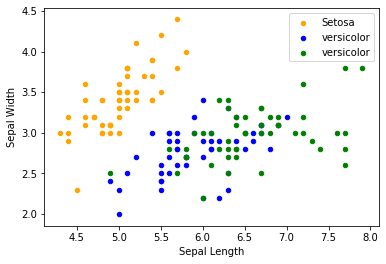

In [6]:
#ax=fig to add the plot eith previous plot fig
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax = fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax = fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title = ("sepal Length vs width")
plt.show()

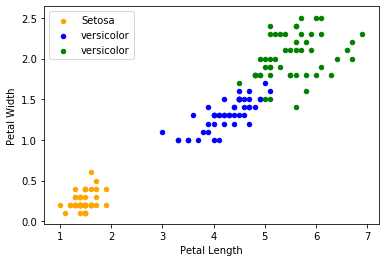

In [7]:
#ax=fig to add the plot eith previous plot fig
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax = fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='versicolor',ax = fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title = ("Petal Length vs width")
plt.show()

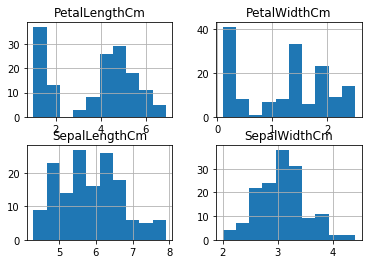

In [8]:
iris.hist()
plt.show()

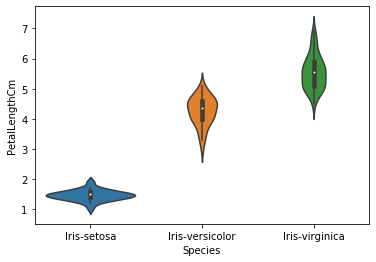

In [9]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
#The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

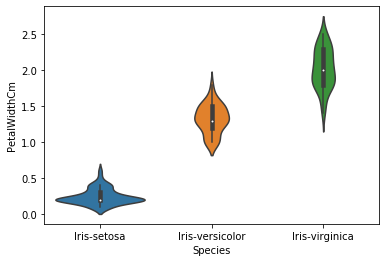

In [10]:
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)

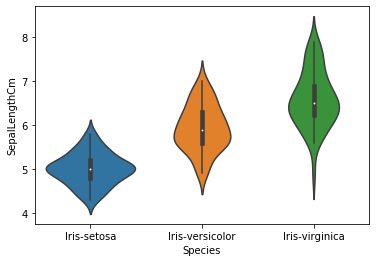

In [11]:
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

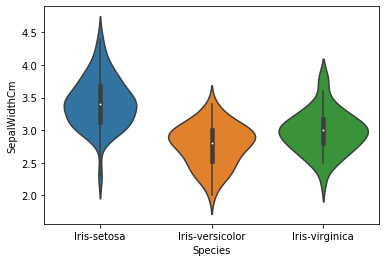

In [12]:
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [13]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

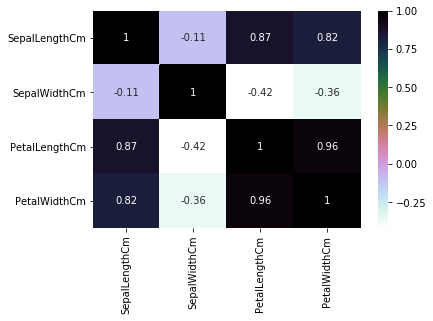

In [15]:
sns.heatmap(iris.corr(),cmap='cubehelix_r',annot=True)
plt.show()

In [16]:
train,test = train_test_split(iris,test_size= 0.3)

In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [18]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction,test_y))

0.9777777777777777


C:\Users\Siyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print(metrics.accuracy_score(prediction,test_y))

0.9555555555555556


In [20]:
model=KNeighborsClassifier(n_neighbors = 3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print(metrics.accuracy_score(prediction,test_y))

0.9555555555555556


In [21]:
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print(metrics.accuracy_score(prediction,test_y))

0.9555555555555556


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train_std = sc.transform(train_X)
X_test_std = sc.transform(test_X)

In [25]:
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train_std,train_y)
prediction=model.predict(X_test_std)
print(metrics.accuracy_score(prediction,test_y))

0.9555555555555556
